<a href="https://colab.research.google.com/github/EsraaMosaad/NTI_training/blob/main/nn_cifar10_dataset___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [ ]:

(x_train,y_train) , (x_test , y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
# np.unique(y_train)
# x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
# x_train_final = x_train.reshape((-1,32*32*3)) 
# x_train_final

In [ ]:
# x_test_final = x_test.reshape((-1,32*32*3))

In [ ]:
model=Sequential() #Create a network sequence.

model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = (32,32,3)))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=16,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Flatten())
model.add(Dense(120,activation = 'relu'))
model.add(Dense(84,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [ ]:
model.compile(optimizer='RMSprop',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
  x=x_train,
  y=y_train,
  shuffle=True,
  epochs=30,
  validation_data=(x_test,y_test)
)


Epoch 1/30


ValueError: ignored

Text(0, 0.5, 'losses')

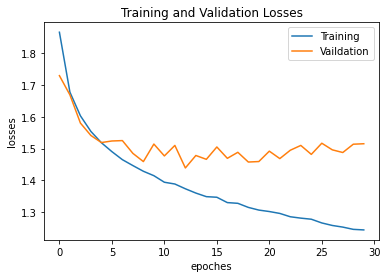

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

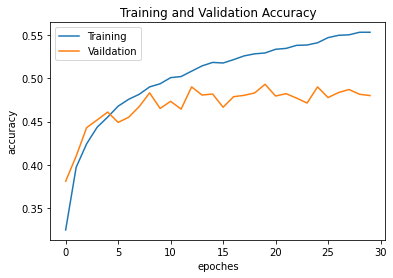

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

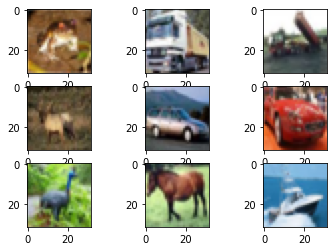

In [ ]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('Accent'))
pyplot.show()